<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Machine_Learning_A_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv')

In [191]:
#x = df.drop('Purchased', axis=1)
#x = df.iloc[:,0:3].values

x = df.iloc[:,:-1].values

np.nanmean(x[:,2],dtype='float32')

63777.777

In [137]:
y = x = df.iloc[:,-1].values

In [138]:
null_data = df[df.isnull().any(axis=1)]

In [139]:
from sklearn.impute import SimpleImputer
sp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [196]:
sp.fit(x[:,1:3])

SimpleImputer()

In [199]:
x[:,1:3]=sp.transform(x[:,1:3])

In [202]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [203]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0] )],remainder='passthrough')

In [205]:
ct.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [206]:
x = ct.transform(x)

In [210]:
from sklearn.preprocessing import LabelEncoder

In [211]:
le = LabelEncoder()

In [213]:
y=le.fit_transform(y)

In [214]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler = StandardScaler()

In [226]:
scaler.fit(X_train[:,3:])

StandardScaler()

In [227]:
X_train[:,3:] = scaler.transform(X_train[:,3:])
X_train

array([[1.0, 0.0, 0.0, 0.9518263102018367, 0.9861483149559838],
       [0.0, 1.0, 0.0, 0.2630675731713777, 0.12381477472917465],
       [1.0, 0.0, 0.0, -0.253501479601474, 0.46175623287088036],
       [0.0, 0.0, 1.0, -0.08131179534386676, -0.1675141687344727],
       [1.0, 0.0, 0.0, -0.5978808481166885, -0.48214945028445844],
       [1.0, 0.0, 0.0, 1.6405850472322658, 1.7202971168288956],
       [0.0, 0.0, 1.0, 0.05261351463427554, -1.1114198518898115],
       [0.0, 0.0, 1.0, -1.9753983221776066, -1.530933452960047]],
      dtype=object)

In [228]:
X_test = scaler.transform(X_test[:,3:])

# Linear Reg

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')

In [333]:
df.head(1)

,YearsExperience,Salary
0,1.1,39343.0


In [310]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [306]:
from sklearn.linear_model import LinearRegression

In [307]:
lm = LinearRegression()

In [308]:
lm.fit(X_train, y_train)

LinearRegression()

In [261]:
y_pred = lm.predict(X_test)

In [313]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

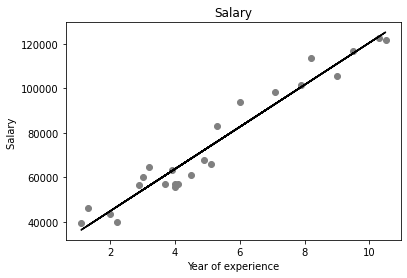

In [327]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

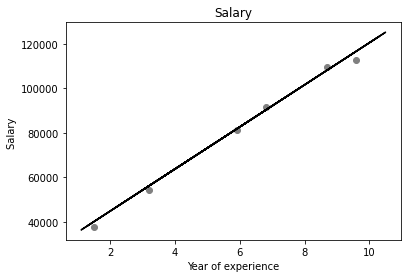

In [326]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

In [332]:
lm.predict([[5]])

array([73242.38682565])

In [329]:
print(lm.coef_)
print(lm.intercept_)

[9440.46383365]
26040.067657420906


# Multi linear

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [335]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')

In [353]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [337]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [343]:
X= df.drop(['Profit','State'],axis=1)
y = df['Profit']

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [345]:
lm.fit(X_train,y_train)

LinearRegression()

In [348]:
y_pred = lm.predict(X_test)

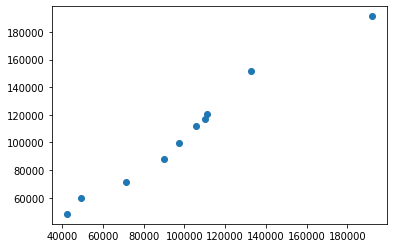

In [352]:
plt.scatter(y_test,y_pred)
plt.plot

In [354]:
from sklearn import metrics

In [359]:
metrics.mean_absolute_error(y_test,y_pred)

6066.865715986147

In [360]:
metrics.mean_squared_error(y_test,y_pred)

66241729.62479818

In [361]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

8138.902237083216